<a href="https://colab.research.google.com/github/Anna-Tereshchuk/Data-Engineering-Notebooks/blob/main/data_manipulation_and_agr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataFrame**  у pandas - це двовимірна структура даних, схожа на двовимірний масив або таблицю з рядками та стовпцями.

In [2]:
import pandas as pd

df = pd.read_csv('/Bike Sharing.csv', encoding='latin1')
print(df)




      ID        Date  Season  Year  Month  Holiday  Weekday  Working Day  \
0      1  01-01-2011       1     0      1        0        6            0   
1      2  02-01-2011       1     0      1        0        0            0   
2      3  03-01-2011       1     0      1        0        1            1   
3      4  04-01-2011       1     0      1        0        2            1   
4      5  05-01-2011       1     0      1        0        3            1   
..   ...         ...     ...   ...    ...      ...      ...          ...   
726  727  27-12-2012       1     1     12        0        4            1   
727  728  28-12-2012       1     1     12        0        5            1   
728  729  29-12-2012       1     1     12        0        6            0   
729  730  30-12-2012       1     1     12        0        0            0   
730  731  31-12-2012       1     1     12        0        1            1   

     Weather      Temp     Temp©  Humidity  Windspeed  Casual Rider  \
0          2  0.

In [41]:
print(df.head(20).to_string())

    ID        Date  Season  Year  Month  Holiday  Weekday  Working Day  Weather      Temp     Temp©  Humidity  Windspeed  Casual Rider  Registered Rider  Total Rider
0    1  01-01-2011       1   NaN      1      NaN      6.0        777.0        2  0.344167  0.363625  0.805833   0.160446           331               654          985
1    2  02-01-2011       1   NaN      1      NaN      NaN        777.0        2  0.363478  0.353739  0.696087   0.248539           131               670          801
2    3  03-01-2011       1   NaN      1      NaN      1.0          1.0        1  0.196364  0.189405  0.437273   0.248309           120              1229         1349
3    4  04-01-2011       1   NaN      1      NaN      2.0          1.0        1  0.200000  0.212122  0.590435   0.160296           108              1454         1562
4    5  05-01-2011       1   NaN      1      NaN      3.0          1.0        1  0.226957  0.229270  0.436957   0.186900            82              1518         1600
5   

**Групування та агрегація**
Обчислення середньої температури за сезонами:

In [3]:
avg_temp_by_season = df.groupby('Season')['Temp'].mean()
print(avg_temp_by_season)


Season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: Temp, dtype: float64


**Обчислення загальної кількості поїздок за місяцями**

In [4]:
total_rides_by_month = df.groupby('Month')['Total Rider'].sum()
print(total_rides_by_month)


Month
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: Total Rider, dtype: int64


**Фільтрація даних**


Фільтрація даних за робочими днями

In [6]:
working_days_data = df[df['Working Day'] == 1]
print(working_days_data)



      ID        Date  Season  Year  Month  Holiday  Weekday  Working Day  \
2      3  03-01-2011       1     0      1        0        1            1   
3      4  04-01-2011       1     0      1        0        2            1   
4      5  05-01-2011       1     0      1        0        3            1   
5      6  06-01-2011       1     0      1        0        4            1   
6      7  07-01-2011       1     0      1        0        5            1   
..   ...         ...     ...   ...    ...      ...      ...          ...   
723  724  24-12-2012       1     1     12        0        1            1   
725  726  26-12-2012       1     1     12        0        3            1   
726  727  27-12-2012       1     1     12        0        4            1   
727  728  28-12-2012       1     1     12        0        5            1   
730  731  31-12-2012       1     1     12        0        1            1   

     Weather      Temp     Temp©  Humidity  Windspeed  Casual Rider  \
2          1  0.

Обчислення середнього, мінімального та максимального значення температури

In [7]:
avg_temp = df['Temp'].mean()
min_temp = df['Temp'].min()
max_temp = df['Temp'].max()
print(f"Average Temp: {avg_temp}, Min Temp: {min_temp}, Max Temp: {max_temp}")


Average Temp: 0.495384788508892, Min Temp: 0.0591304, Max Temp: 0.861667


Обчислення кореляції між температурою та кількістю поїздок

In [8]:
correlation = df['Temp'].corr(df['Total Rider'])
print(f"Correlation between Temp and Total Rider: {correlation}")


Correlation between Temp and Total Rider: 0.6274940090334918


Побудова графіку кількості поїздок за місяцями

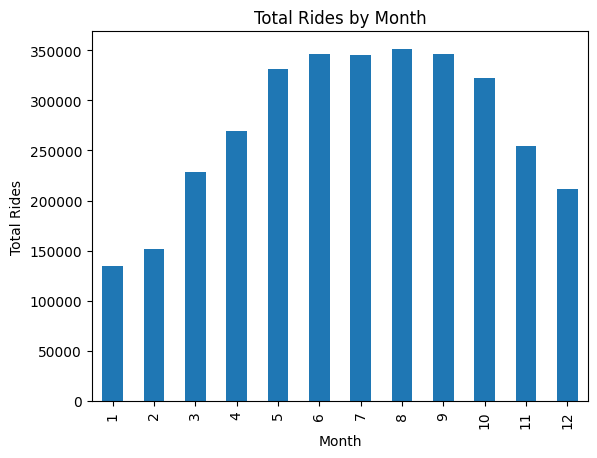

In [9]:
import matplotlib.pyplot as plt

df.groupby('Month')['Total Rider'].sum().plot(kind='bar')
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.show()
